## ✅ 1. **6-Point Averaging Filter**

### 📌 Purpose:

Averaging filters are **low-pass filters** — they smooth the input by averaging neighboring samples.

### 📘 Difference Equation:

For a 6-point moving average:

$$
y[n] = \frac{1}{6} \left( x[n] + x[n-1] + x[n-2] + x[n-3] + x[n-4] + x[n-5] \right)
$$

This is a **FIR (Finite Impulse Response)** filter with coefficients:

$$
h[n] = \begin{cases}
\frac{1}{6} & \text{for } n = 0 \text{ to } 5 \\
0 & \text{otherwise}
\end{cases}
$$

### 🔧 Realization Structure:

You implement this using:

* 5 delay elements (`z⁻¹`)
* 6 multipliers (each with gain $\frac{1}{6}$)
* 5 adders

It looks like a **tap-delay line** (direct form FIR):

```
x[n] ─▶(+)───▶(+)───▶(+)───▶(+)───▶(+)───▶ y[n]
       ▲     ▲      ▲      ▲      ▲
      1/6   1/6    1/6    1/6    1/6    1/6
       │     │      │      │      │
     z⁻¹   z⁻¹    z⁻¹    z⁻¹    z⁻¹
```

---

## ✅ 2. **6-Point Differencing Filter**

### 📌 Purpose:

Differencing filters are **high-pass filters** — they highlight **changes** in signal, such as edges.

### 📘 Difference Equation:

A simple 6-point differencing filter can be:

$$
y[n] = x[n] - x[n-6]
$$

This captures the **difference between current and 6-step past input**.

Or, a generalized differencing version (finite difference with equal weights):

$$
y[n] = x[n] - x[n-1] + x[n-2] - x[n-3] + x[n-4] - x[n-5]
$$

### 🔧 Realization Structure:

Use:

* 5 delay elements
* 6 multipliers (+1 or -1)
* 5 adders

For example, for:

$$
y[n] = x[n] - x[n-6]
$$

Structure:

```
x[n] ─┬────────────▶(+)──────▶ y[n]
      │
     z⁻⁶
      │
      └────▶(-1)
```

For:

$$
y[n] = x[n] - x[n-1] + x[n-2] - x[n-3] + x[n-4] - x[n-5]
$$

You alternate signs and add up 6 delayed values.

---

## 🧠 Summary Table

| Filter Type       | Equation                                    | Behavior                   |
| ----------------- | ------------------------------------------- | -------------------------- |
| 6-pt Averaging    | $y[n] = \frac{1}{6} \sum_{k=0}^{5} x[n-k]$  | Low-pass (smooth)          |
| 6-pt Differencing | $y[n] = x[n] - x[n-6]$ or alternating signs | High-pass (detect changes) |

---

/tmp/ipykernel_8070/604181384.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


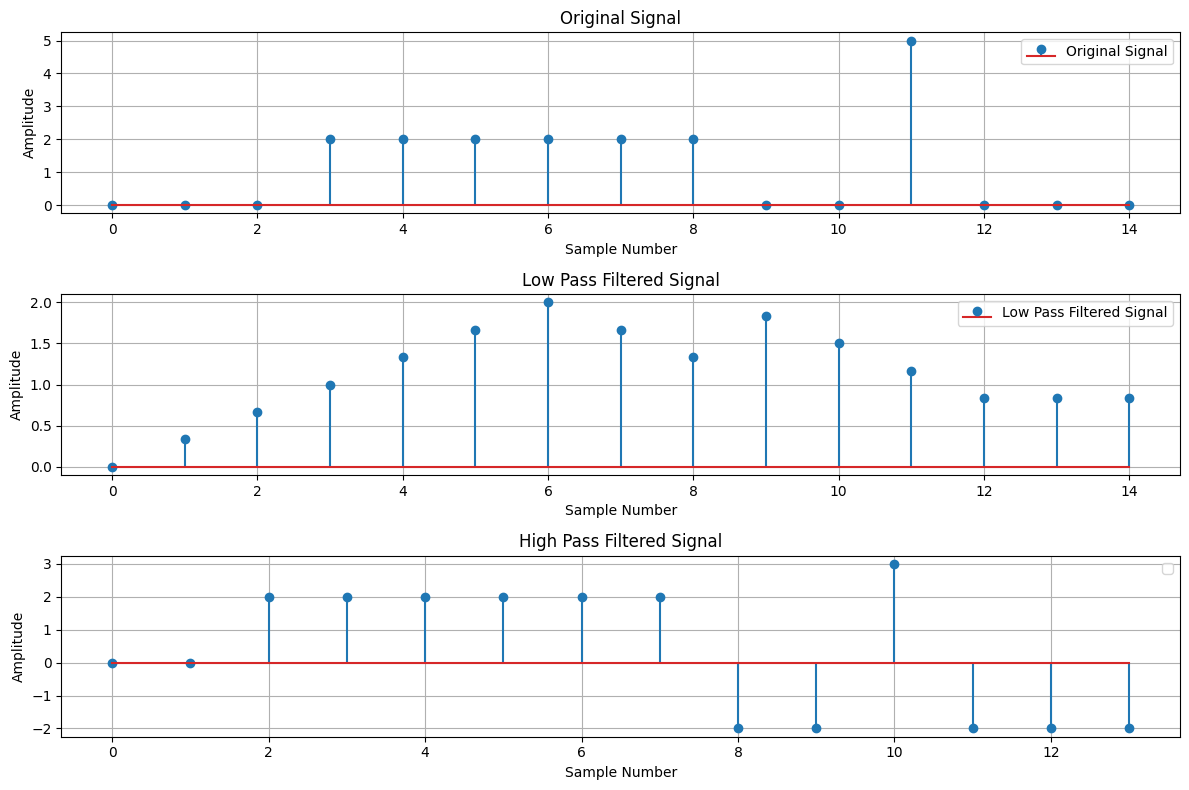

In [19]:
import numpy as np
import matplotlib.pyplot as plt

#Creating sample signal
x = np.array([0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 5, 0, 0, 0])
n = np.arange(len(x))

# Low pass filter
avg_filter = np.ones(6) / 6
low_pass = np.convolve(x, avg_filter, mode='same')

# High pass filter
x_padded = np.concatenate((np.zeros(5) , x))
high_pass = x_padded[6:] - x_padded[:-6] # x[n] - x[n-6]
high_pass = high_pass[:len(x)] # Truncate to original length

# Plotting
plt.figure(figsize=(12, 8))

#Ordinal Signal
plt.subplot(3, 1, 1)
plt.stem(n, x, 'o-', label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

# Low Pass Filtered Signal
plt.subplot(3, 1, 2)
plt.stem(n, low_pass, 'o-', label='Low Pass Filtered Signal')
plt.title('Low Pass Filtered Signal')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

# High Pass Filtered Signal
plt.subplot(3, 1, 3)
plt.stem(n[:len(high_pass)], high_pass)  # Truncate n to match high_pass length
plt.title('High Pass Filtered Signal')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()